In [1]:
from tardis.workflows.v_inner_solver import InnerVelocitySolverWorkflow
from tardis.io.configuration.config_reader import Configuration

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
config = Configuration.from_yaml('../tardis_example.yml')

In [3]:
from astropy import units as u

config.montecarlo.convergence_strategy['v_inner_boundary'] = {
    'damping_constant' : 0.5,
    'threshold' : 0.01,
    'type' : 'damped'
    }

config.montecarlo.convergence_strategy.stop_if_converged = True
config.model.structure.velocity.start = 5000 * u.km/u.s # Larger window over which to search
config.model.structure.velocity.num = 50 # Increase number of shells

workflow = InnerVelocitySolverWorkflow(
    config, tau=2.0/3,
    mean_optical_depth="rosseland"
)

[tardis.io.model.parse_atom_data][INFO   ]  
	
	Reading Atomic Data from ../kurucz_cd23_chianti_H_He.h5 (parse_atom_data.py:40)


[tardis.io.atom_data.util][INFO   ]  
	
	Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path.
	Exists in TARDIS Data repo /home/runner/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:34)


[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:262)


[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data, linelist_atoms, linelist_molecules (base.py:266)


[tardis.io.model.parse_density_configuration][WARNING]  
	Number of density points larger than number of shells. Assuming inner point irrelevant (parse_density_configuration.py:114)


[tardis.model.matter.decay][INFO   ]  
	Decaying abundances for 1123200.0 seconds (decay.py:101)


In [4]:
workflow.run()

[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 1 of 20 (v_inner_solver.py:309)


[py.warnings         ][WARNING]  
	/home/runner/work/tardis/tardis/tardis/transport/montecarlo/montecarlo_main_loop.py:123: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  vpacket_collection = vpacket_collections[i]
 (warnings.py:112)


TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 2 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 3 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 4 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	Resized Geometry, Convergence Suppressed
	  Old Geometry: [XXXXXXXXXXXXXXXXXXXX------------------------------]
	  New Geometry: [XXXXXXXXXXXXXXXXXXX-------------------------------] (v_inner_solver.py:174)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 5 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 6 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	Resized Geometry, Convergence Suppressed
	  Old Geometry: [XXXXXXXXXXXXXXXXXXX-------------------------------]
	  New Geometry: [XXXXXXXXXXXXXXXXXX--------------------------------] (v_inner_solver.py:174)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 7 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	Iteration converged 1/4 consecutive times. (v_inner_solver.py:201)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 8 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	Iteration converged 2/4 consecutive times. (v_inner_solver.py:201)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 9 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	Iteration converged 3/4 consecutive times. (v_inner_solver.py:201)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 10 of 20 (v_inner_solver.py:309)


[tardis.workflows.v_inner_solver][INFO   ]  
	Iteration converged 4/4 consecutive times. (v_inner_solver.py:201)


[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting final iteration (v_inner_solver.py:339)


In [5]:
import matplotlib.pyplot as plt

In [6]:
spectrum = workflow.spectrum_solver.spectrum_real_packets
spectrum_virtual = workflow.spectrum_solver.spectrum_virtual_packets
spectrum_integrated = workflow.spectrum_solver.spectrum_integrated

[py.warnings         ][WARNING]  
	/home/runner/work/tardis/tardis/tardis/spectrum/formal_integral.py:380: UserWarning: The number of interpolate_shells was not specified. The value was set to 80.
  warnings.warn(
 (warnings.py:112)


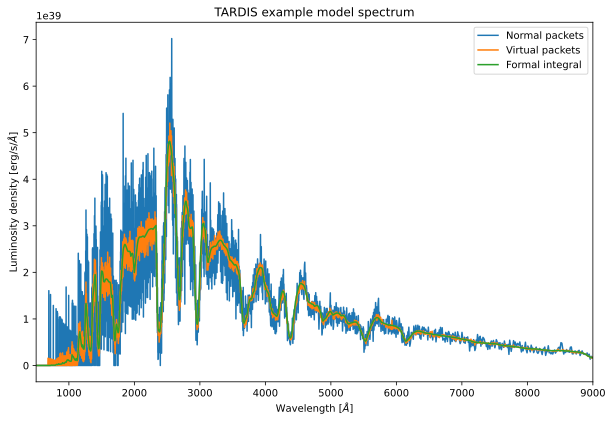

In [7]:
%matplotlib inline
plt.figure(figsize=(10, 6.5))

spectrum.plot(label="Normal packets")
spectrum_virtual.plot(label="Virtual packets")
spectrum_integrated.plot(label='Formal integral')

plt.xlim(500, 9000)
plt.title("TARDIS example model spectrum")
plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Luminosity density [erg/s/$\AA$]")
plt.legend()
plt.show()